### 1) Aplicar un método de cluster, por ejemplo Fuzzy C Means para encontrar dos centros de cluster.

### 2)Calcular el ancho de las funciones de pertenencia utilizando la fórmula que aparece en el video anterior.
### 3)Graficar las dos gaussianas con el centro y dispersión asociados a los clusters hallados.
### 4)Repita para 3 clusters.

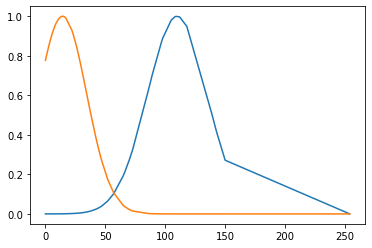

In [144]:
import numpy as np
from fcmeans import FCM
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/LogicaDifusa/covid.csv",sep=';')
X = df.to_numpy()
X = np.sort(X, axis = 0)
n_clusters = 3

#Consigna uno.

#Calcular el ancho de las funciones de pertenencia con la formula 
# anchoi = (radio influencia) * xiMax - xiMin / raiz(8)

def gaussmf(data, mean, sigma):
    return np.exp(-((data - mean)**2.) / (2 * sigma**2.))

class InputsFIS:
    def __init__(self,data,min,max,center,K):
        self.K = K
        self.data = data
        self.maxValue = max
        self.minValue = min
        self.center = center
        self.s = self.maxValue - self.minValue / 8 ** 0.5
    
    def plot(self):
        Y = gaussmf(self.data, self.center, self.s)
        plt.plot(X,Y)

class FIS:
    def __init__(self,data):
        self.memberfunc = []
        self.inputs = []
        self.X = data
        
    def genFIS(self):
        my_model = FCM(n_clusters = 2)
        my_model.fit(self.X)
        centers = my_model.centers
        labels = my_model.predict(X)
        x1 = Inputs(self.X,self.X[labels == 0].max(), self.X[labels == 0].min(), centers[0],2)
        x2 = Inputs(self.X,self.X[labels == 1].max(), self.X[labels == 1].min(), centers[1],2)
        x1.plot()
        x2.plot()
    
FIS = FIS(X)
FIS.genFIS()